In [1]:
from scipy import sparse

In [2]:
# import data and put the data as anndata


adataX = sparse.load_npz('./GI_processed_KeptPerturb_RAW_adataCSRMatrix.npz')

import pandas as pd
dataOBS = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataOBS.csv')
dataVAR = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataVAR.csv')

In [3]:
dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

from anndata import AnnData
GI_adata = AnnData(X = adataX, var = dataVARU, obs = dataOBSU )

In [4]:
import scvi
print(scvi.__version__)

ModuleNotFoundError: No module named 'scvi'

In [11]:
scvi.data.setup_anndata(GI_adata)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 109950 cells, 2279 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [12]:
model = scvi.model.SCVI(GI_adata)
model

In [13]:
# scVi model with 
model.train(n_epochs = 400)

INFO     Training for 400 epochs                                                             
INFO     KL warmup for 400 epochs                                                            
Training...: 100%|██████████| 400/400 [6:01:46<00:00, 54.27s/it]  
INFO     Training time:  21706 s. / 400 epochs                                               


In [15]:
model.save("./GI_scVI/models1/")

In [17]:
posteriorZmean = model.get_latent_representation(give_mean = True)
posteriorZsample = model.get_latent_representation(give_mean = False)

posteriorLmean = model.get_latent_library_size(give_mean = True)
posteriorLSample = model.get_latent_library_size(give_mean = False)
import numpy as np

np.save('./GI_scVI/output/posteriorZmean.npy', posteriorZmean)
np.save('./GI_scVI/output/posteriorZsample.npy', posteriorZsample)


np.save('./GI_scVI/output/posteriorLmean.npy', posteriorLmean)
np.save('./GI_scVI/output/posteriorLsample.npy', posteriorLsample)

NameError: name 'posteriorLsample' is not defined

In [18]:
posteriorLSample
posteriorLsample

array([[6.7380037],
       [6.1268487],
       [6.5174565],
       ...,
       [5.8106756],
       [7.2423844],
       [6.007987 ]], dtype=float32)

In [20]:
np.save('./GI_scVI/output/posteriorLsample.npy', posteriorLSample)

# Visualize the results

## 1.0 400 epochs trained on all cells including those without perturbation information

In [5]:
# import data and put the data as anndata


adataX = sparse.load_npz('./GI_processed_KeptPerturb_RAW_adataCSRMatrix.npz')
dataOBS = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataOBS.csv')
dataVAR = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataVAR.csv')

In [6]:
dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

from anndata import AnnData
GI_adata = AnnData(X = adataX, var = dataVARU, obs = dataOBSU )

In [7]:
GI_adata.shape

(109950, 2279)

In [9]:
pd_cells = pd.DataFrame(GI_adata.obs.index)
k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')
pd_kept_cells = pd.merge(pd_cells, k562_tfs_7_cell, left_on = 'cell_ids', right_on = 'cell_barcode', 
                        how = 'left')
GI_adata_kept = GI_adata[~pd_kept_cells['cell_barcode'].isnull(), :]
pd_kept_cells_kept = pd_kept_cells[~pd_kept_cells['cell_barcode'].isnull()]

In [13]:
import numpy as np
posteriorZmean = np.load('./GI_scVI/output/posteriorZmean.npy')
posteriorZsample = np.load('./GI_scVI/output/posteriorZsample.npy')


posteriorLmean = np.load('./GI_scVI/output/posteriorLmean.npy', )
posteriorLsample = np.load('./GI_scVI/output/posteriorLsample.npy')

In [18]:
kept_index = list(~pd_kept_cells['cell_barcode'].isnull())

In [23]:
posteriorZmeanK = posteriorZmean[kept_index, :]
posteriorZsampleK = posteriorZsample[kept_index, :]

posteriorLmeanK = posteriorLmean[kept_index, :]
posteriorLsampleK = posteriorLsample[kept_index, :]

In [24]:
obs1_np = np.load('cell_meta_KeptPerturb_RAW_LibraryCheck_PyThon37_drug1.npy')
obs2_np = np.load('cell_meta_KeptPerturb_RAW_LibraryCheck_PyThon37_drug2.npy')

In [61]:
obs1_npU = np.array([obs1_np[i] if obs1_np[i][:3] != 'NEG' else obs1_np[i][3:].lower() for i in range(obs1_np.shape[0])])
obs1_npU

array(['ctrl0', 'TSC22D1', 'KLF1', ..., 'BCORL1', 'ZBTB10', 'MAP4K3'],
      dtype='<U8')

In [62]:
obs2_npU = np.array([obs2_np[i] if obs2_np[i][:3] != 'NEG' else obs2_np[i][3:].lower() for i in range(obs2_np.shape[0])])
obs2_npU

array(['ctrl0', 'ctrl0', 'MAP2K6', ..., 'ctrl0', 'PTPN12', 'ctrl0'],
      dtype='<U8')

In [64]:
obs1_npUU = np.array([obs1_npU[i] if obs1_npU[i] != "ctrl0" else "ctrl" for i in range(obs1_npU.shape[0])])
obs1_npUU

array(['ctrl', 'TSC22D1', 'KLF1', ..., 'BCORL1', 'ZBTB10', 'MAP4K3'],
      dtype='<U8')

In [65]:
obs2_npUU = np.array([obs2_npU[i] if obs2_npU[i] != "ctrl0" else "ctrl" for i in range(obs2_npU.shape[0])])
obs2_npUU

array(['ctrl', 'ctrl', 'MAP2K6', ..., 'ctrl', 'PTPN12', 'ctrl'],
      dtype='<U8')

In [66]:
obs_np = np.array([obs1_npUU[i] + "/" + obs2_npUU[i] for i in range(obs1_npUU.shape[0])])

In [55]:
(obs2_np == "IGDCC3").sum()

1370

In [54]:
(obs1_np == "IRF1").sum()

837

In [67]:
dictCluster = {"PRO-GROWTH": 
    {
    "Cluster1": ["AHR/KLF1", "ctrl/KLF1", "KLF1/ctrl", "KLF1/TGFBR2", "KLF1/BAK1", "CEBPE/KLF1"], 
    "Cluster2": ["MAP2K6/ctrl", "ctrl/MAP2K6", "MAP2K6/ELMSAN1", "MAP2K3/MAP2K6", "KLF1/MAP2K6", "ctrl/ELMSAN1", 
                 "MAP2K3/ctrl", "MAP2K3/ELMSAN1", "ELMSAN1/ctrl", "MAP2K3/SLC38A2"]
    }, 
               "MEGAKARYOCYTE": 
    {
        "Cluster3": ["TGFBR2/IGDCC3", "ctrl/IGDCC3", "IGDCC3/ctrl", "PRTG/ctrl", "TGFBR2/PRTG", "ETS2/PRTG", 
                     "ctrl/PRTG", "ETS2/IGDCC3", "MAPK1/PRTG", "IGDCC3/MAPK1"],
        "Cluster4": ["MAPK1/TGFBR2", "MAPK1/ctrl", "ctrl/ETS2", "ctrl/MAPK1", "ETS2/MAPK1", "CEBPB/MAPK1"], 
        "Cluster5": ["COL2A1/ctrl", "KLF1/COL2A1", "COL1A1/ctrl", "ctrl/COL2A1"]
    },
               "GRANULOCYTE/APOPTOSIS": 
    {
        "Cluster6": ["FEV/ISL2", "ctrl/FEV", "FEV/ctrl", "AHR/FEV", "FEV/CBFA2T3"], 
        "Cluster7": ["CEBPE/RUNX1T1", "CEBPE/ctrl", "ctrl/CEBPE", "KLF1/CEBPA", "ctrl/CEBPA", "ETS2/CEBPE", 
                     "CEBPA/ctrl", "FOSB/CEBPE", "CEBPB/ctrl", "CEBPE/CEBPB", "ctrl/CEBPB",  "CEBPB/CEBPA", 
                     "CEBPE/CEBPA", "ZC3HAV1/CEBPA", "FOSB/CEBPB", "CEBPE/SPI1", "SPI1/ctrl", "ctrl/SPI1"]
    }, 
               "PIONEER FACTORS":
    {
        "Cluster8": ["MAP2K6/IKZF3", "MAPK1/IKZF3", "MAP2K3/IKZF3", "ETS2/IKZF3", "FOSB/IKZF3", "ctrl/IKZF3", 
                     "POU3F2/CBFA2T3", "IKZF3/ctrl"], 
        "Cluster9": ["FOXA3/FOXL2", "MIDN/ctrl", "TP73/ctrl", "FOXA1/FOXF1", "FOXA3/FOXF1", "FOXA1/HOXB9", 
                     "FOXF1/FOXL2", "FOXA3/FOXA1", "FOXA3/ctrl", "FOXA1/FOXL2", "FOXA3/HOXB9", "FOXF1/HOXB9", 
                     "FOXL2/MEIS1", "POU3F2/FOXL2", "HOXA13/ctrl", "LYL1/IER5L", "ctrl/HOXC13", "HOXC13/ctrl", "RHOXF2b/ctrl", 
                     "DUSP9/SNAI1", "ZBTB10/SNAI1", "RHOXF2B/SET", "SET/CEBPE", "ctrl/SET", "SET/ctrl", "IRF1/SET"], 
        "Cluster10": ["DUSP9/KLF1", "DUSP9/ETS2", "DUSP9/ctrl", "DUSP9/PRTG", "DUSP9/IGDCC3"]
    }, 
               "ERYTHROID": 
    {
        "Cluster11": ["ATL1/ctrl", "UBASH3B/PTPN12", "CBL/PTPN12", "PTPN12/UBASH3A", "CBL/CNN1", "PTPN12/PTPN9",
                      "PTPN12/ZBTB25", "CNN1/UBASH3A", "BPGM/SAMD1", "SAMD1/PTPN12", "UBASH3B/CNN1", "UBASH3B/ZBTB25", 
                      "SAMD1/UBASH3B", "UBASH3B/PTPN9", "PTPN1/ctrl", "CBL/UBASH3B", "CBL/PTPN9", "UBASH3B/UBASH3A"], 
        "Cluster12":["TBX3/TBX2", "TBX2/ctrl", "ctrl/TBX2", "SGK1/TBX2", "SGK1/ctrl"]
    }, 
               "G1 CELL CYCLE ARREST":
    {
        "Cluster13": ["CDKN1C/CDKN1B", "ctrl/CDKN1A", "CDKN1B/CDKN1A", "CDKN1A/ctrl", "CDKN1C/ctrl", "CDKN1C/CDKN1A", 
                      "CDKN1B/ctrl"]
    }
}

In [ ]:
dictCluster = {"PRO-GROWTH": 
    {
    "Cluster1": {"AHR/KLF1", "ctrl/KLF1", "KLF1/ctrl", "KLF1/TGFBR2", "KLF1/BAK1", "CEBPE/KLF1"}, 
    "Cluster2": ["MAP2K6/ctrl", "ctrl/MAP2K6", "MAP2K6/ELMSAN1", "MAP2K3/MAP2K6", "KLF1/MAP2K6", "ctrl/ELMSAN1", 
                 "MAP2K3/ctrl", "MAP2K3/ELMSAN1", "ELMSAN1/ctrl", "MAP2K3/SLC38A2"]
    }, 
               "MEGAKARYOCYTE": 
    {
        "Cluster3": ["TGFBR2/IGDCC3", "ctrl/IGDCC3", "IGDCC3/ctrl", "PRTG/ctrl", "TGFBR2/PRTG", "ETS2/PRTG", 
                     "ctrl/PRTG", "ETS2/IGDCC3", "MAPK1/PRTG", "IGDCC3/MAPK1"],
        "Cluster4": ["MAPK1/TGFBR2", "MAPK1/ctrl", "ctrl/ETS2", "ctrl/MAPK1", "ETS2/MAPK1", "CEBPB/MAPK1"], 
        "Cluster5": ["COL2A1/ctrl", "KLF1/COL2A1", "COL1A1/ctrl", "ctrl/COL2A1"]
    },
               "GRANULOCYTE/APOPTOSIS": 
    {
        "Cluster6": ["FEV/ISL2", "ctrl/FEV", "FEV/ctrl", "AHR/FEV", "FEV/CBFA2T3"], 
        "Cluster7": ["CEBPE/RUNX1T1", "CEBPE/ctrl", "ctrl/CEBPE", "KLF1/CEBPA", "ctrl/CEBPA", "ETS2/CEBPE", 
                     "CEBPA/ctrl", "FOSB/CEBPE", "CEBPB/ctrl", "CEBPE/CEBPB", "ctrl/CEBPB",  "CEBPB/CEBPA", 
                     "CEBPE/CEBPA", "ZC3HAV1/CEBPA", "FOSB/CEBPB", "CEBPE/SPI1", "SPI1/ctrl", "ctrl/SPI1"]
    }, 
               "PIONEER FACTORS":
    {
        "Cluster8": ["MAP2K6/IKZF3", "MAPK1/IKZF3", "MAP2K3/IKZF3", "ETS2/IKZF3", "FOSB/IKZF3", "ctrl/IKZF3", 
                     "POU3F2/CBFA2T3", "IKZF3/ctrl"], 
        "Cluster9": ["FOXA3/FOXL2", "MIDN/ctrl", "TP73/ctrl", "FOXA1/FOXF1", "FOXA3/FOXF1", "FOXA1/HOXB9", 
                     "FOXF1/FOXL2", "FOXA3/FOXA1", "FOXA3/ctrl", "FOXA1/FOXL2", "FOXA3/HOXB9", "FOXF1/HOXB9", 
                     "FOXL2/MEIS1", "POU3F2/FOXL2", "HOXA13/ctrl", "LYL1/IER5L", "ctrl/HOXC13", "HOXC13/ctrl", "RHOXF2b/ctrl", 
                     "DUSP9/SNAI1", "ZBTB10/SNAI1", "RHOXF2B/SET", "SET/CEBPE", "ctrl/SET", "SET/ctrl", "IRF1/SET"], 
        "Cluster10": ["DUSP9/KLF1", "DUSP9/ETS2", "DUSP9/ctrl", "DUSP9/PRTG", "DUSP9/IGDCC3"]
    }, 
               "ERYTHROID": 
    {
        "Cluster11": ["ATL1/ctrl", "UBASH3B/PTPN12", "CBL/PTPN12", "PTPN12/UBASH3A", "CBL/CNN1", "PTPN12/PTPN9",
                      "PTPN12/ZBTB25", "CNN1/UBASH3A", "BPGM/SAMD1", "SAMD1/PTPN12", "UBASH3B/CNN1", "UBASH3B/ZBTB25", 
                      "SAMD1/UBASH3B", "UBASH3B/PTPN9", "PTPN1/ctrl", "CBL/UBASH3B", "CBL/PTPN9", "UBASH3B/UBASH3A"], 
        "Cluster12":["TBX3/TBX2", "TBX2/ctrl", "ctrl/TBX2", "SGK1/TBX2", "SGK1/ctrl"]
    }, 
               "G1 CELL CYCLE ARREST":
    {
        "Cluster13": ["CDKN1C/CDKN1B", "ctrl/CDKN1A", "CDKN1B/CDKN1A", "CDKN1A/ctrl", "CDKN1C/ctrl", "CDKN1C/CDKN1A", 
                      "CDKN1B/ctrl"]
    }
}

In [ ]:
df = pd.concat(pd.DataFrame(dictCluster) for k, v in dictCluster.items())

In [75]:
testdict = {'Cluster1': ['AHR/KLF1', 'ctrl/KLF1', 'KLF1/ctrl', 'KLF1/TGFBR2', 'KLF1/BAK1', 'CEBPE/KLF1'], 'Cluster2': ['MAP2K6/ctrl', 'ctrl/MAP2K6', 'MAP2K6/ELMSAN1', 'MAP2K3/MAP2K6', 'KLF1/MAP2K6', 'ctrl/ELMSAN1', 'MAP2K3/ctrl', 'MAP2K3/ELMSAN1', 'ELMSAN1/ctrl', 'MAP2K3/SLC38A2']}

In [81]:
testdict.items()

dict_items([('Cluster1', ['AHR/KLF1', 'ctrl/KLF1', 'KLF1/ctrl', 'KLF1/TGFBR2', 'KLF1/BAK1', 'CEBPE/KLF1']), ('Cluster2', ['MAP2K6/ctrl', 'ctrl/MAP2K6', 'MAP2K6/ELMSAN1', 'MAP2K3/MAP2K6', 'KLF1/MAP2K6', 'ctrl/ELMSAN1', 'MAP2K3/ctrl', 'MAP2K3/ELMSAN1', 'ELMSAN1/ctrl', 'MAP2K3/SLC38A2'])])

In [86]:
wholeDf = None
for k, v in dictCluster.items():
    for k1, v1 in v.items():
        dataDf  = pd.DataFrame({
              'Group': k, 
              'Cluster': k1, 
              'Perturb': v1
        })
        if wholeDf is None: 
            wholeDf = dataDf
        else: 
            wholeDf = pd.concat([wholeDf, dataDf], axis = 0)

In [87]:
wholeDf

,Group,Cluster,Perturb
0,PRO-GROWTH,Cluster1,AHR/KLF1
1,PRO-GROWTH,Cluster1,ctrl/KLF1
2,PRO-GROWTH,Cluster1,KLF1/ctrl
3,PRO-GROWTH,Cluster1,KLF1/TGFBR2
4,PRO-GROWTH,Cluster1,KLF1/BAK1
...,...,...,...
2,G1 CELL CYCLE ARREST,Cluster13,CDKN1B/CDKN1A
3,G1 CELL CYCLE ARREST,Cluster13,CDKN1A/ctrl
4,G1 CELL CYCLE ARREST,Cluster13,CDKN1C/ctrl
5,G1 CELL CYCLE ARREST,Cluster13,CDKN1C/CDKN1A


In [88]:
obs_pd = pd.DataFrame(obs_np)
obs_pd.head()

,0
0,ctrl/ctrl
1,TSC22D1/ctrl
2,KLF1/MAP2K6
3,ctrl10/ctrl
4,CEBPE/RUNX1T1


In [89]:
obs_pd.columns = ['perturbation']
obs_pd.head()

,perturbation
0,ctrl/ctrl
1,TSC22D1/ctrl
2,KLF1/MAP2K6
3,ctrl10/ctrl
4,CEBPE/RUNX1T1


In [90]:
obs_meta_pd = pd.merge(obs_pd, wholeDf, left_on = 'perturbation', right_on = 'Perturb', 
                        how = 'left')

In [98]:
obs_meta_pd.head()

,perturbation,Group,Cluster,Perturb
0,ctrl/ctrl,NaN,NaN,NaN
1,TSC22D1/ctrl,NaN,NaN,NaN
2,KLF1/MAP2K6,PRO-GROWTH,Cluster2,KLF1/MAP2K6
3,ctrl10/ctrl,NaN,NaN,NaN
4,CEBPE/RUNX1T1,GRANULOCYTE/APOPTOSIS,Cluster7,CEBPE/RUNX1T1


In [94]:
obs_meta_pd.to_csv('cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv')

In [95]:
posteriorZLmeanK = np.concatenate([posteriorZmeanK, posteriorLmeanK], axis =1 )
posteriorZLsampleK = np.concatenate([posteriorZsampleK, posteriorLsampleK], axis =1 )

In [96]:
print(posteriorZLmeanK.shape); print(posteriorZLsampleK.shape)

(109738, 11)
(109738, 11)


In [97]:
import umap 

umap1 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZmeanK)
umap2 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZsampleK)

umap3 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZLmeanK)
umap4 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZLsampleK)

/home/hengshi/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengshi/.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/hengshi/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengsh

In [100]:
from plotnine import *
df_tsne_pr = pd.DataFrame(umap1.copy())
df_tsne_pr['x-umap'] = umap1[:,0]
df_tsne_pr['y-umap'] = umap1[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Group.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)
chart_pr

/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


<Figure size 640x480 with 1 Axes>

<ggplot: (2978608452928)>

In [101]:
%matplotlib inline

/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


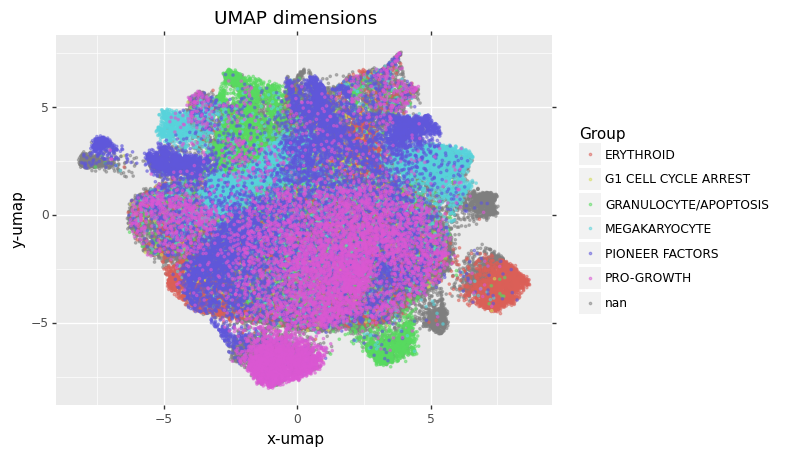

<ggplot: (2978608452928)>

In [102]:
chart_pr

In [103]:
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./GI_scVI/output/UMAP_Zmean_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was deprec

In [104]:
chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Cluster.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Perturbation.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./GI_scVI/output/UMAP_Zmean_Cluster.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was depr

In [105]:
df_tsne_pr = pd.DataFrame(umap2.copy())
df_tsne_pr['x-umap'] = umap2[:,0]
df_tsne_pr['y-umap'] = umap2[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Group.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Cluster.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Perturbation.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)



/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./GI_scVI/output/UMAP_Zsample_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was depr

In [106]:
df_tsne_pr = pd.DataFrame(umap4.copy())
df_tsne_pr['x-umap'] = umap4[:,0]
df_tsne_pr['y-umap'] = umap4[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Group.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Cluster.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Perturbation.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)



/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./GI_scVI/output/UMAP_ZLsample_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was dep

In [107]:
df_tsne_pr = pd.DataFrame(umap3.copy())
df_tsne_pr['x-umap'] = umap3[:,0]
df_tsne_pr['y-umap'] = umap3[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Group.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Cluster.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Perturbation.png"
figure_path_pr = "./GI_scVI/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)



/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./GI_scVI/output/UMAP_ZLmean_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was depre

## 2.0 1000 epochs trained on only cells with perturbation information


In [109]:
posteriorZmeanK = np.load('../../20201118/scVI_GI_k562/output/posteriorZmean.npy')
posteriorZsampleK = np.load('../../20201118/scVI_GI_k562/output/posteriorZsample.npy')


posteriorLmeanK = np.load('../../20201118/scVI_GI_k562/output/posteriorLmean.npy', )
posteriorLsampleK = np.load('../../20201118/scVI_GI_k562/output/posteriorLsample.npy')

In [110]:
posteriorZLmeanK = np.concatenate([posteriorZmeanK, posteriorLmeanK], axis =1 )
posteriorZLsampleK = np.concatenate([posteriorZsampleK, posteriorLsampleK], axis =1 )

In [111]:
posteriorZLsampleK.shape

(109738, 11)

In [112]:
umap1 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZmeanK)
umap2 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZsampleK)

umap3 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZLmeanK)
umap4 = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(posteriorZLsampleK)

/home/hengshi/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengshi/.local/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/hengshi/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengshi/.local/lib/python3.6/site-packages/umap/nndescent.py", l

In [113]:
df_tsne_pr = pd.DataFrame(umap1.copy())
df_tsne_pr['x-umap'] = umap1[:,0]
df_tsne_pr['y-umap'] = umap1[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Group.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Cluster.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zmean_Perturbation.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)



/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../../20201118/scVI_GI_k562/output/UMAP_Zmean_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameo

In [114]:
df_tsne_pr = pd.DataFrame(umap2.copy())
df_tsne_pr['x-umap'] = umap2[:,0]
df_tsne_pr['y-umap'] = umap2[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Group.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Cluster.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_Zsample_Perturbation.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../../20201118/scVI_GI_k562/output/UMAP_Zsample_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The fram

In [115]:
df_tsne_pr = pd.DataFrame(umap3.copy())
df_tsne_pr['x-umap'] = umap3[:,0]
df_tsne_pr['y-umap'] = umap3[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Group.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Cluster.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLmean_Perturbation.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../../20201118/scVI_GI_k562/output/UMAP_ZLmean_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frame

In [119]:
(df_tsne_pr['Perturbation'] == 'ctrl/ctrl').sum()

2504

In [120]:
(df_tsne_pr['Perturbation'] == 'ctrl1/ctrl').sum()

2922

In [121]:
(df_tsne_pr['Perturbation'] == 'ctrl0/ctrl').sum()

0

In [122]:
(df_tsne_pr['Perturbation'] == 'ctrl11/ctrl').sum()

2806

In [123]:
df_tsne_pr.shape

(109738, 7)

In [116]:
df_tsne_pr = pd.DataFrame(umap4.copy())
df_tsne_pr['x-umap'] = umap4[:,0]
df_tsne_pr['y-umap'] = umap4[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Group.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Cluster.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_ZLsample_Perturbation.png"
figure_path_pr = "../../20201118/scVI_GI_k562/output/" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)


/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../../20201118/scVI_GI_k562/output/UMAP_ZLsample_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The fra

In [1]:
pwd

'/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI'